In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


sample_data = [
    ("Apple", 10, 2.5),
    ("Banana", 20, 1.5),
    ("Orange", 15, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 10, 1.5),
    ("Grapes", 12, 4.0)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)
conn.commit()


In [5]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print("=== Sales Summary ===")
print(df)


=== Sales Summary ===
  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         30     45.0
2  Grapes         12     48.0
3  Orange         15     45.0


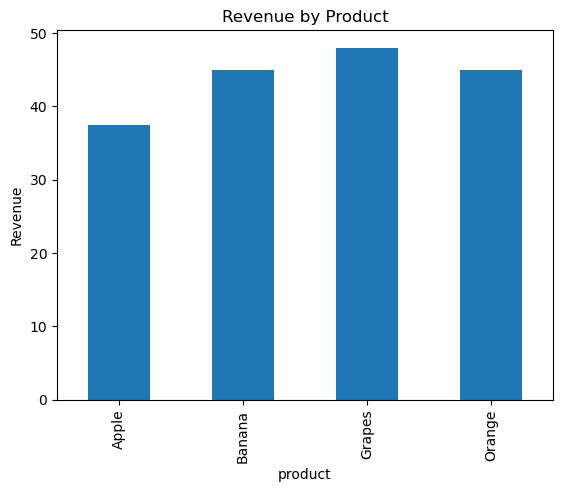

In [6]:
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.savefig("sales_chart.png")
plt.show()


In [7]:
conn.close()
